In [1]:
from scipy.integrate import odeint
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Симметричный генетический триггер Жакоба-Моно

In [4]:
# Our equation system has a form:
# x' = P(x,y)
# y' = Q(x,y)

P = lambda x,y: -x + L/(1+y**2)
Q = lambda x,y: -y + L/(1+x**2)


fun = lambda p,t: np.array([P(p[0],p[1]), Q(p[0],p[1])])
#            p - vector input [x,y] 
#            : - output vector [x', y']

fun_ = lambda p,t: -fun(p,t)

### Поле направлений и несколько траекторий, демонстрирующих поведение системы

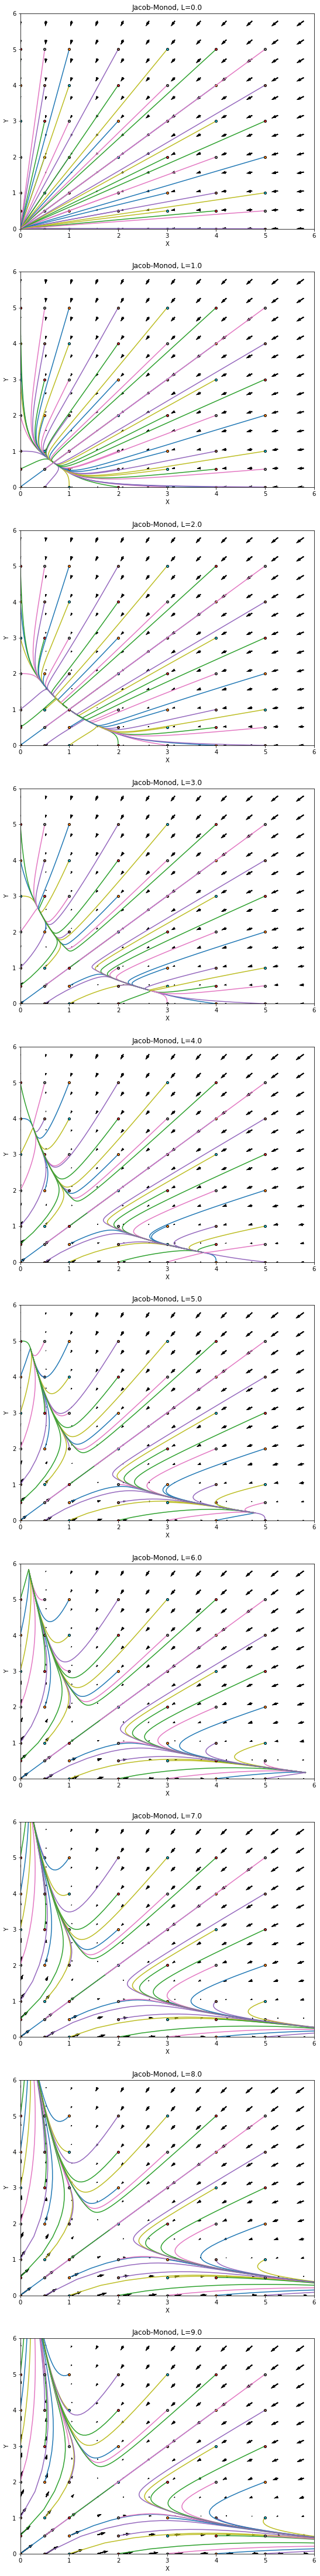

In [5]:
Ls = np.linspace(0,9,10)

fig, axes = plt.subplots(
        len(Ls), 1,
        squeeze=False, figsize=(9,8*len(Ls)))

xy_0 = [0,0.5,1,2,3,4,5]
tt = np.linspace(0, 1000, 10000)

for i, L in np.ndenumerate(Ls):
    for x0_ in xy_0:
        for y0_ in xy_0:
            xy0 = [x0_, y0_]
            zz = odeint(fun, xy0, tt)
            axes[i[0], 0].plot(
                zz[:,0], zz[:,1],
                label=r"$x_0,y_0=({x0},{y0})$".format(x0=x0_, y0=y0_))
            axes[i[0], 0].plot(
                [xy0[0]], [xy0[1]], 'o', mec='k', ms=4)

        xx = np.linspace(0,10,20)
        yy = np.linspace(0,10,20)
        Xm,Ym = np.meshgrid(xx,yy)
        axes[i[0], 0].quiver(Xm,Ym, P(Xm,Ym), Q(Xm,Ym), scale_units='xy', angles='xy')

#         axes[i[0], 0].legend()
        axes[i[0], 0].set_xlim(0,6)
        axes[i[0], 0].set_ylim(0,6)
        axes[i[0], 0].set_xlabel('X')
        axes[i[0], 0].set_ylabel('Y')
        axes[i[0], 0].set_title(f"Jacob-Monod, L={L}")

### (1) Параметры, при которых симметричный стационар устойчив

#### Собственные значения и вектора в точке (1,1) при L=1

In [5]:
L = 1

xy0 = [1, 1]
zzs = odeint(fun, xy0, tt)
zzs[-1]

xs = zzs[-1][0]
ys = zzs[-1][1]
print(xs,ys)
J = np.array([[-1, -2*L*ys/(1+ys**2)**2],[-2*L*xs/(1+xs**2)**2, -1]])
print(J)

vals, vecs = np.linalg.eig(J)
vals, vecs

0.6823278038280194 0.6823278038280194
[[-1.         -0.63534439]
 [-0.63534439 -1.        ]]


(array([-0.36465561, -1.63534439]),
 array([[ 0.70710678,  0.70710678],
        [-0.70710678,  0.70710678]]))

In [6]:
import seaborn as sns

Собственные вектора (1,1) и (1,-1)

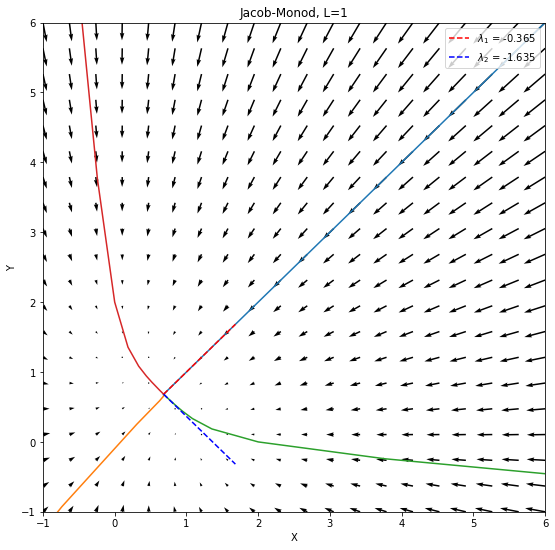

In [7]:
plt.figure(figsize=(9,9))
xy0s = [
    (zzs[-1][0]+1e-3, zzs[-1][1]+1e-3),
    (zzs[-1][0]+1e-3, zzs[-1][1]-1e-3),
#     (zzs[-1][0]-1e-3, zzs[-1][1]+1e-3),
    (2, 0),
    (0, 2),
]
tt = np.linspace(0, 100, 100)

for xy0 in xy0s:
    zz_1 = odeint(fun_, xy0, tt)
    zz_2 = odeint(fun, xy0, tt)
#     print(zz_1.shape, zz_2.shape)
    zz_x = np.concatenate((zz_1[:,0], zz_2[:,0]), axis=None)
    zz_y = np.concatenate((zz_1[:,1], zz_2[:,1]), axis=None)
#     print(zz_x.shape, zz_y.shape)
    sns.lineplot(x=zz_x, y=zz_y)
#     sns.lineplot(x=zz_1[:,0], y=zz_1[:,1])
#     plt.plot([xy0[0]], [xy0[1]], 'o', mec='k', ms=4)

xx = np.linspace(-1,6,20)
yy = np.linspace(-1,6,20)
Xm,Ym = np.meshgrid(xx,yy)
plt.quiver(Xm,Ym, P(Xm,Ym), Q(Xm,Ym), scale_units='xy', angles='xy')

plt.xlim(-1,6)
plt.ylim(-1,6)
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f"Jacob-Monod, L={L}")

plt.plot([xs, xs+1] , [ys, ys+1], 
             '--r', label='$\lambda_1$ = %.3f' % vals[0])
plt.plot([xs, xs+1] , [ys, ys-1], 
             '--b', label='$\lambda_2$ = %.3f' % vals[1])
plt.legend()

Оранжевая траектория, которая выходит из стационара, смещённого немного вдоль синего вектора, не самая касающаяся синего вектора, а наоборот :) Хотя это вообще кажется нелогичным

### (2) Параметры, при которых симметричный стационар седлового типа

In [8]:
L = 9

xy0 = [2, 2]
zzs = odeint(fun, xy0, tt)
zzs[-1]

xs = zzs[-1][0]
ys = zzs[-1][1]
print(xs,ys)
J = np.array([[-1, -2*L*ys/(1+ys**2)**2],[-2*L*xs/(1+xs**2)**2, -1]])
print(J)

vals, vecs = np.linalg.eig(J)
vals, vecs

1.9201751213471137 1.9201751213471137
[[-1.         -1.57329442]
 [-1.57329442 -1.        ]]


(array([ 0.57329442, -2.57329442]),
 array([[ 0.70710678,  0.70710678],
        [-0.70710678,  0.70710678]]))

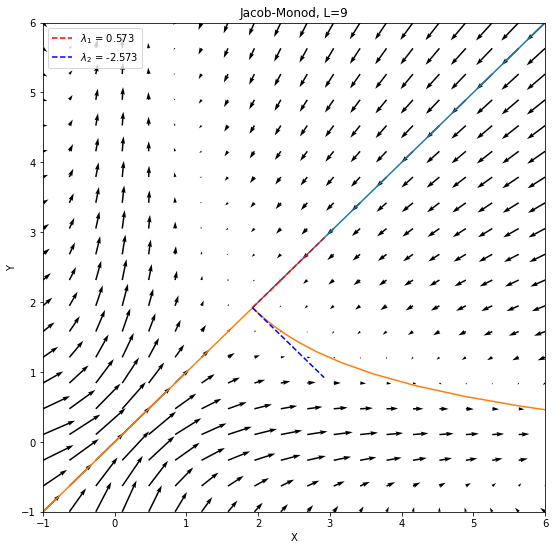

In [9]:
plt.figure(figsize=(9,9))
xy0s = [
    (zzs[-1][0]+1e-3, zzs[-1][1]+1e-3),
    (zzs[-1][0]+1e-3, zzs[-1][1]-1e-3),
#     (zzs[-1][0]-1e-3, zzs[-1][1]+1e-3),
#     (2, 0),
#     (0, 2),
]
tt = np.linspace(0, 50, 100)

for xy0 in xy0s:
    zz_1 = odeint(fun_, xy0, tt)
    zz_2 = odeint(fun, xy0, tt)
#     print(zz_1.shape, zz_2.shape)
    zz_x = np.concatenate((zz_1[:,0], zz_2[:,0]), axis=None)
    zz_y = np.concatenate((zz_1[:,1], zz_2[:,1]), axis=None)
#     print(zz_x.shape, zz_y.shape)
    sns.lineplot(x=zz_x, y=zz_y)
#     sns.lineplot(x=zz_1[:,0], y=zz_1[:,1])
#     plt.plot([xy0[0]], [xy0[1]], 'o', mec='k', ms=4)

xx = np.linspace(-1,6,20)
yy = np.linspace(-1,6,20)
Xm,Ym = np.meshgrid(xx,yy)
plt.quiver(Xm,Ym, P(Xm,Ym), Q(Xm,Ym), scale_units='xy', angles='xy')

plt.xlim(-1,6)
plt.ylim(-1,6)
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f"Jacob-Monod, L={L}")

plt.plot([xs, xs+1] , [ys, ys+1], 
             '--r', label='$\lambda_1$ = %.3f' % vals[0])
plt.plot([xs, xs+1] , [ys, ys-1], 
             '--b', label='$\lambda_2$ = %.3f' % vals[1])
plt.legend()

# 2. Модель хищник-жертва

### "Плохая модель" хищник-жертва Лотки-Вольтерра

In [3]:
# Our equation system has a form:
# x' = P(x,y)
# y' = Q(x,y)

P = lambda x,y: a11*x + a12*x*y
Q = lambda x,y: a21*x*y + a22*y


fun = lambda p,t: np.array([P(p[0],p[1]), Q(p[0],p[1])])
#            p - vector input [x,y] 
#            : - output vector [x', y']

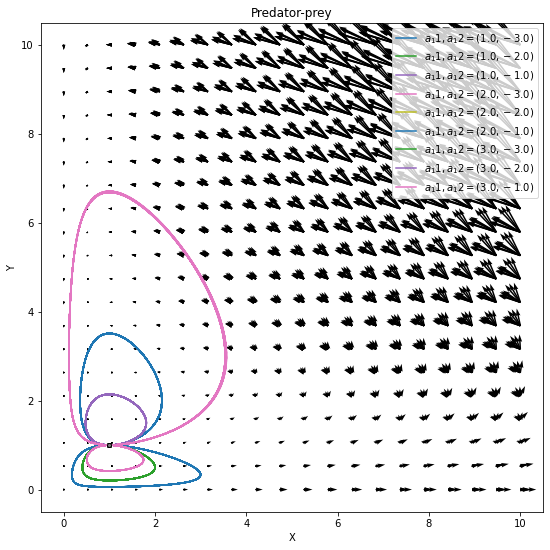

In [4]:
a11 = 1
a12 = -1
a21 = 1
a22 = -1

xy_0 = [1,2,3]
tt = np.linspace(0, 100, 1000)

plt.figure(figsize=(9,9))

for a11 in np.linspace(1,3,3):
    for a12 in np.linspace(-3, -1, 3):
    # for x0_ in xy_0:
    #     for y0_ in xy_0:
        xy0 = [1, 1]
        zz = odeint(fun, xy0, tt)
        plt.plot(
            zz[:,0], zz[:,1],
            label=r"$a_11,a_12=({a11},{a12})$".format(a11=a11, a12=a12))
        plt.plot(
            [xy0[0]], [xy0[1]], 'o', mec='k', ms=4)

        xx = np.linspace(0,10,20)
        yy = np.linspace(0,10,20)
        Xm,Ym = np.meshgrid(xx,yy)
        plt.quiver(Xm,Ym, P(Xm,Ym), Q(Xm,Ym), scale_units='xy', angles='xy')

#         axes[i[0], 0].legend()
# plt.xlim(0,6)
# plt.ylim(0,6)
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Predator-prey")
plt.legend()

Воообще тут центр не распадается при малейшем шевелении правой части, как описано в Мюррее, при любых значениях параметров особая точка $(1,1)$ является устойчивым стационарным состоянием типа центр, так как след матрицы в этой точке равен 0, а других особых точек (кроме $(0,0)$) в этой системе нет.

### Альтернативная модель хищник-жертва

In [66]:
# Our equation system has a form:
# x' = P(x,y)
# y' = Q(x,y)

P = lambda x,y: a11*x*(1 - x/a13) + a12*x*y**2
Q = lambda x,y: a21*x*y**2 + a22*y**3


fun = lambda p,t: np.array([P(p[0],p[1]), Q(p[0],p[1])])
#            p - vector input [x,y] 
#            : - output vector [x', y']
fun_ = lambda p,t: -fun(p,t)

$x'= a_{11}x(1 - x/a_{13}) + a_{12}xy^2$  
$y'= a_{21}xy^2 + a_{22}y^3$

Популяция жертвы растёт не линейно, а с насыщением (так как кормовая база ограничена), а для того, чтобы жертва была поймана хищниками, необходимо наличие сразу двух хищников (кооперация хищников при охоте).  
Популяция хищника убывает как $y^2$ (тут возможно эпидемиологическая ситуация сказывается, плотность контактов, а также внутривидовая конкуренция за вакцинацию :) )

Если проанализировать эту систему на наличие стационарных точек, то обнаруживается, что для ненулевых значений x и y стационарных точек может быть либо две, либо одна, либо 0, в зависимости от знака D:

$
\begin{align}
\begin{cases}
x'= 0\\\\
y'= 0
\end{cases}
\begin{cases}
a_{11}(1 - x/a_{13}) + a_{12}y^2 = 0\\\\
a_{21}x + a_{22}y = 0
\end{cases}
\begin{cases}
x = -\frac{a_{22}}{a_{21}}y\\\\
y = \frac{-b\pm D^{-0.5}}{2a_{12}}, b = \frac{a_{22}a_{11}}{a_{21}a_{13}}, D=b^2-4a_{12}a_{11}
\end{cases}
\end{align}
$

Так как $a_{22}, a_{12}<0$, а $a_{11}, a_{21}, a_{13} > 0$, то $b<0$    
Для существования положительного стационарного состояния требуется соблюдение условий $D > 0$ и $\pm D^{-0.5}<b$, что означает, что возможно только одно положительное стационарное значение y, когда $-D^{0.5}<b$, т.е. $D>b^2$, что при указанных знаках параметров всегда выполняется. Таким образом, положительное стационарное состояние одно

Возьмём некие значения параметров:

In [71]:
a11 = 1.2
a12 = -1
a13 = 3
a21 = 0.1
a22 = -1

In [99]:
b = a22*a11/(a21*a13)
D = b**2 - 4*a12*a11
b, D

(-3.999999999999999, 20.799999999999994)

In [75]:
# стационарные точки:
y1 = (-b+D**0.5)/2*a12
y2 = (-b-D**0.5)/2*a12

x1 = -a22*y1/a21
x2 = -a22*y2/a21
print(x1,y1)
print(x2,y2)

-42.80350850198275 -4.280350850198275
2.803508501982761 0.2803508501982761


При данных значениях параметров есть единственная стационарная точка в положительной четверти, посчитаем в ней матрицу Якоби, чтобы определить тип стационара:

In [97]:
J = np.array(
    [
        [
            a11-2*a11*x2/a13+a12*y2**2, 
            2*a12*x2*y2
        ],
        [
            a21*y2**2,
            2*a21*x2*y2 + 3*a22*y2**2
            
        ]
    ]
)

print(J)

vals, vecs = np.linalg.eig(J)
vecs_n = np.linalg.norm(vecs, axis=1).T
print(vecs_n)
vecs /= vecs_n[:,None]
vals, vecs

[[-1.1214034  -1.57193198]
 [ 0.00785966 -0.0785966 ]]
[1.30354426 0.54842718]


(array([-1.10941796, -0.09058204]),
 array([[-0.76711698,  0.64150724],
        [ 0.01390237, -0.99990336]]))

То есть стационар типа устойчивого узла

Text(0.5, 1.0, 'Predator-prey')

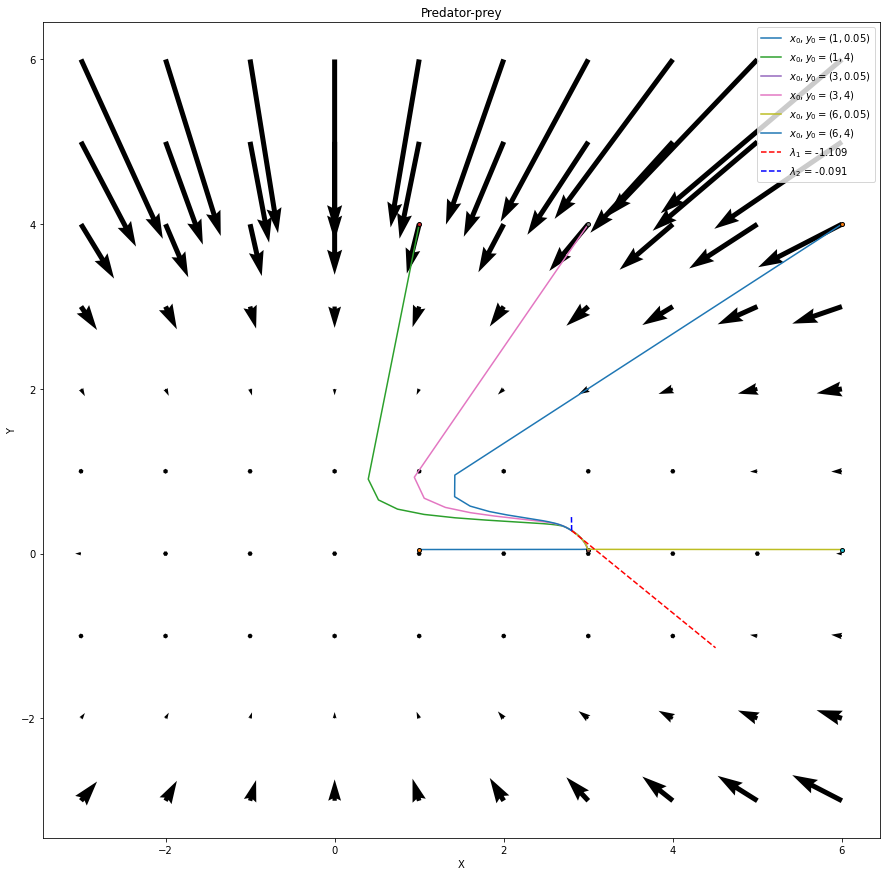

In [98]:
x0s = [1, 3, 6]
y0s = [0.05, 4]
tt = np.linspace(0, 3000, 5000)

plt.figure(figsize=(15,15))

for x0_ in x0s:
    for y0_ in y0s:
        xy0 = [x0_, y0_]
        zz = odeint(fun, xy0, tt)
        plt.plot(
            zz[:,0], zz[:,1],
            label=r"$x_0,y_0=({x0},{y0})$".format(x0=x0_, y0=y0_))
        plt.plot(
            [xy0[0]], [xy0[1]], 'o', mec='k', ms=4)

xx = np.linspace(-3,6,10)
yy = np.linspace(-3,6,10)
Xm,Ym = np.meshgrid(xx,yy)
plt.quiver(Xm,Ym, P(Xm,Ym), Q(Xm,Ym), scale_units='xy', angles='xy')

plt.plot([x2, x2 + vecs[0,0]*vals[0]*2] , [y2, y2 + vecs[0,1]*vals[0]*2], 
             '--r', label='$\lambda_1$ = %.3f' % vals[0])
plt.plot([x2, x2 + vecs[1,0]*vals[1]*2] , [y2, y2 + vecs[1,1]*vals[1]*2], 
             '--b', label='$\lambda_2$ = %.3f' % vals[1])
plt.legend()

plt.xlabel('X')
plt.ylabel('Y')
plt.title("Predator-prey")

Варьированием значений параметров можно поменять тип стационара:

In [108]:
a11 = 2
a12 = -1
a13 = 3
a21 = 1
a22 = -1

b = a22*a11/(a21*a13)
D = b**2 - 4*a12*a11
print("b,D: ", b, D)

# положительная стационарная точка:
y2 = (-b-D**0.5)/2*a12
x2 = -a22*y2/a21
print("x2,y2: ",x2,y2)

J = np.array(
    [
        [
            a11-2*a11*x2/a13+a12*y2**2, 
            2*a12*x2*y2
        ],
        [
            a21*y2**2,
            2*a21*x2*y2 + 3*a22*y2**2
            
        ]
    ]
)

print("J:\n", J)

vals, vecs = np.linalg.eig(J)
vecs_n = np.linalg.norm(vecs, axis=1).T
vecs /= vecs_n[:,None]
vals, vecs

b,D:  -0.6666666666666666 8.444444444444445
x2,y2:  1.1196329811802246 1.1196329811802246
J:
 [[-0.74642199 -2.50715603]
 [ 1.25357801 -1.25357801]]


(array([-1.+1.75459792j, -1.-1.75459792j]),
 array([[0.70710678+0.j        , 0.70710678-0.j        ],
        [0.1011417 -0.69983595j, 0.1011417 +0.69983595j]]))

Стационар типа устойчивый фокус

Text(0.5, 1.0, 'Predator-prey')

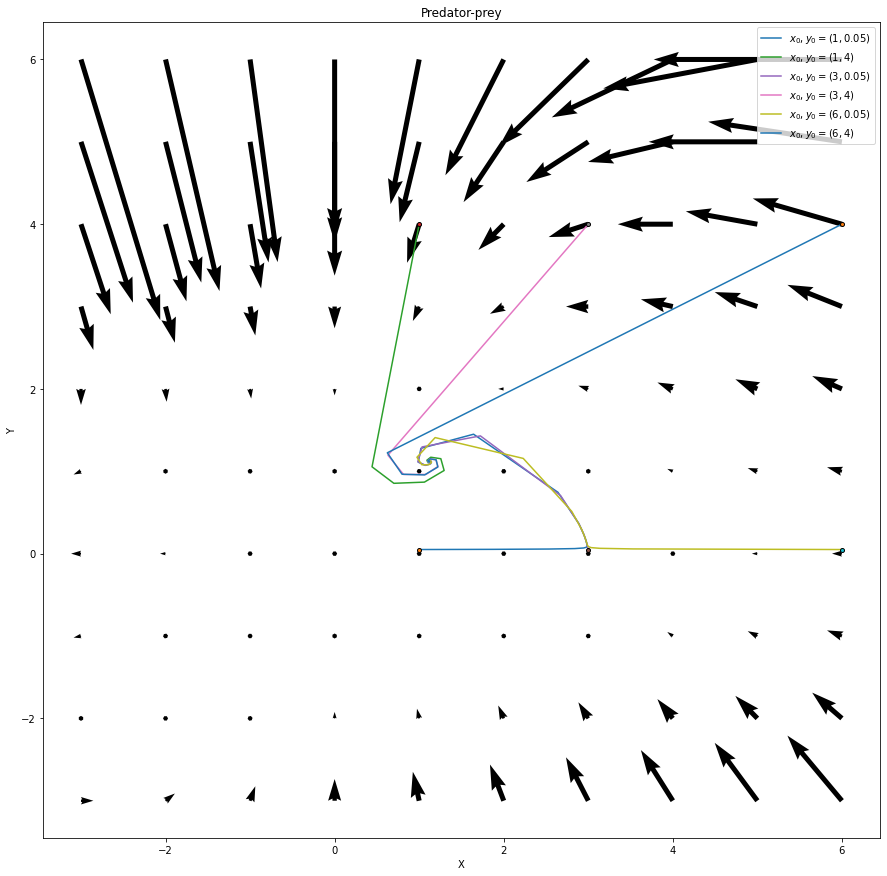

In [110]:
x0s = [1, 3, 6]
y0s = [0.05, 4]
tt = np.linspace(0, 3000, 5000)

plt.figure(figsize=(15,15))

for x0_ in x0s:
    for y0_ in y0s:
        xy0 = [x0_, y0_]
        zz = odeint(fun, xy0, tt)
        plt.plot(
            zz[:,0], zz[:,1],
            label=r"$x_0,y_0=({x0},{y0})$".format(x0=x0_, y0=y0_))
        plt.plot(
            [xy0[0]], [xy0[1]], 'o', mec='k', ms=4)

xx = np.linspace(-3,6,10)
yy = np.linspace(-3,6,10)
Xm,Ym = np.meshgrid(xx,yy)
plt.quiver(Xm,Ym, P(Xm,Ym), Q(Xm,Ym), scale_units='xy', angles='xy')
plt.legend()

plt.xlabel('X')
plt.ylabel('Y')
plt.title("Predator-prey")

При желании можно исследовать собственные числа матрицы $J$ в точке $(x2,y2)$, чтобы узнать, при каких значениях параметров происходит потеря устойчивости $Re(\lambda)>0$ (переход в неустойчивый фокус или седло), так как можно выразить матрицу Якоби в единственной положительной стационарной точке через значения параметров.

In [112]:
b = a22*a11/(a21*a13)
D = b**2 - 4*a12*a11
print("b,D: ", b, D)

# положительная стационарная точка:
y2 = (-b-D**0.5)/2*a12
x2 = -a22*y2/a21
print("x2,y2: ",x2,y2)

J = np.array(
    [
        [
            a11-2*a11*x2/a13+a12*y2**2, 
            2*a12*x2*y2
        ],
        [
            a21*y2**2,
            2*a21*x2*y2 + 3*a22*y2**2
            
        ]
    ]
)

SpJ = a11-2*a11*x2/a13+a12*y2**2 + 2*a21*x2*y2 + 3*a22*y2**2
detJ = (a11-2*a11*x2/a13+a12*y2**2)*(2*a21*x2*y2 + 3*a22*y2**2)-2*a12*x2*y2*a21*y2**2

print("SpJ, detJ:", SpJ, detJ)

b,D:  -0.6666666666666666 8.444444444444445
x2,y2:  1.1196329811802246 1.1196329811802246
SpJ, detJ: -2.000000000000001 4.078613858633112
